## Python code

In [ ]:
# when not already installed
!pip install geopandas
!pip install pysal 

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
import matplotlib.pylab as plt
%matplotlib inline

In [58]:
path_capital = 'shp/radios_censo_2010.shp'
path_provincia = 'shp/prov_buenos_aires.shp'
radios_capital = radio_ciudad(path_capital)
radios_provincia = radio_provincia(path_provincia)

In [57]:
def radio_ciudad(filename):
    df = gpd.read_file(filename)
    df[['comuna','fraccion','radio']] = df['CO_FRAC_RA'].apply(lambda x: pd.Series(x.split('_')))
    df['clavera'] = "020" + df['comuna'].apply('{:0>2}'.format) + df['fraccion'].apply('{:0>2}'.format) + df['radio'].apply('{:0>2}'.format)
    return df

def radio_provincia(filename):
    df = gpd.read_file(filename)
    df['clavera'] = "06" + df['COD_PART'] + df['FRACCION'] + df['RADIO']
    return df

In [63]:
radios_m = pd.concat([radios_capital, radios_provincia], axis=0)
radios_buenos_aires = radios_m[['clavera','geometry']].copy()

In [91]:
# import census data
ind_hac = pd.read_csv('HOGAR-INDHAC.csv')
educ_1 = pd.read_csv('PERSONA-P09.csv')
cal_const = pd.read_csv('VIVIENDA-INCALCONS.csv')
cal_mat = pd.read_csv('VIVIENDA-INMAT.csv')
# clean data
ind_hac.columns = ['radio','0.5','0.51-0.99','1-1.49','1.5-1.99','2-3','+3','Total']
ind_hac['ind_hac'] = ((ind_hac['+3'])/(ind_hac['Total']))*100
educ_1['ind_univ'] = ((educ_1['7 Universitario'])/(educ_1['TOTAL']))
cal_const['ind_cal_const'] = ((cal_const['3 Insuficiente'])/(cal_const['TOTAL'])) * 100
censo = pd.concat([ind_hac['radio'],ind_hac['ind_hac'],cal_const['ind_cal_const']],axis=1)
censo.rename(columns={'radio': 'clavera'}, inplace=True)
censo['clavera'] = '0' + censo['clavera'].astype(str)

In [118]:
result = pd.merge(radios_buenos_aires, censo, on='clavera')

In [97]:
result.columns

Index([u'clavera', u'geometry', u'ind_hac', u'ind_cal_const'], dtype='object')

In [120]:
result.to_file('radios_bs_as',driver='ESRI Shapefile')

In [116]:
orig_capital = radios_capital.crs
target_crs = {u'ellps':u'WGS84',u'k':1,u'x_0':5500000,u'y_0':0, u'units':u'm',
              u'no_defs':True, u'proj':u'tmerc', u'lat_0':-90, u'lon_0':-60}
radios_capital.to_crs(crs=target_crs, inplace=True)

In [117]:
radios_capital.crs

{u'ellps': u'WGS84',
 u'k': 1,
 u'lat_0': -90,
 u'lon_0': -60,
 u'no_defs': True,
 u'proj': u'tmerc',
 u'units': u'm',
 u'x_0': 5500000,
 u'y_0': 0}

In [101]:
radios_provincia.crs

{u'ellps': u'WGS84',
 u'k': 1,
 u'lat_0': -90,
 u'lon_0': -60,
 u'no_defs': True,
 u'proj': u'tmerc',
 u'units': u'm',
 u'x_0': 5500000,
 u'y_0': 0}

In [ ]:
# plot the shapefile using plot() and additional information
ax = result.plot(legend=True, column='ind_hac', cmap='OrRd', scheme="Quantiles", figsize=(18,16))
plt.title('Indice de Hacinamiento en Buenos Aires', fontsize = 20)

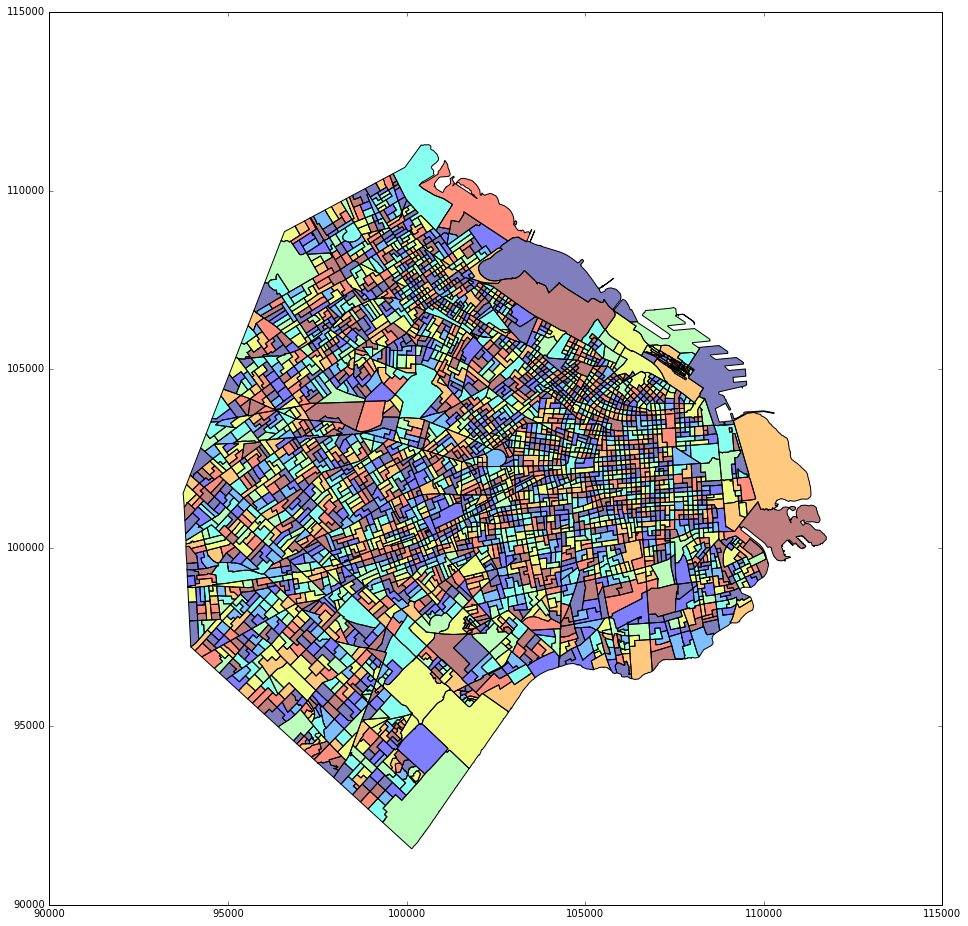

In [5]:
radios_capital.plot(figsize=(18,16))

In [20]:
radios_capital.to_file('nadoti2',driver='ESRI Shapefile')

In [10]:
import fiona; fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GMT': 'raw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'PCIDSK': 'r',
 'PDS': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

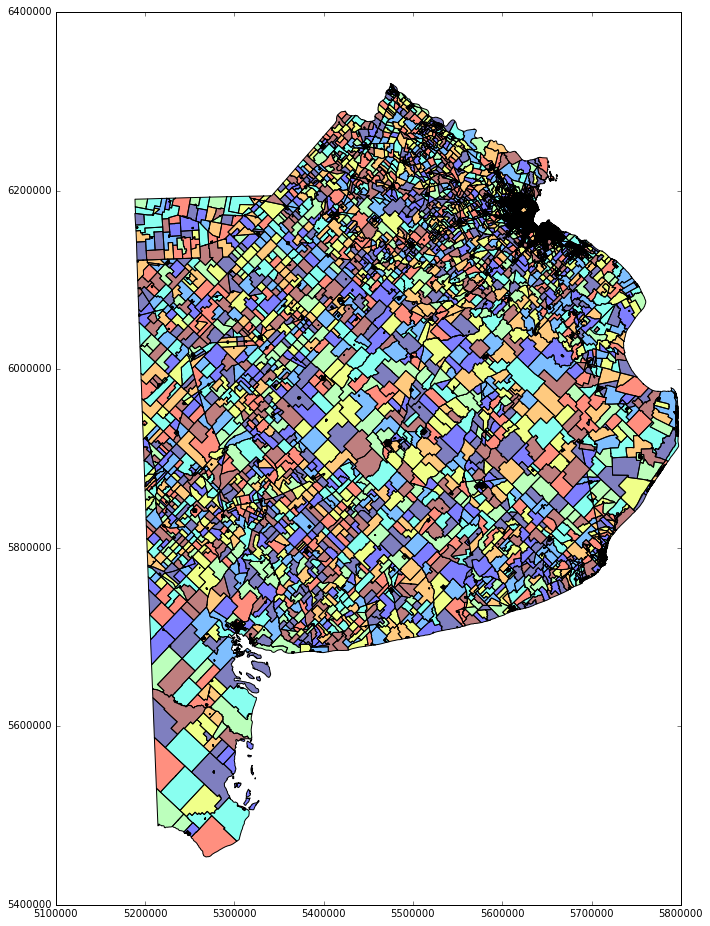

In [7]:
radios_provincia.plot(figsize=(18,16))